In [1]:
import numpy as np
from thefittest.optimizers import SaDE2005
from thefittest.benchmarks import Rastrigin
from thefittest.tools.transformations import donothing


n_dimension = 10
left_border = -4.5
right_border = 4.5


number_of_iterations = 1500
population_size = 100


left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)

model = SaDE2005(fitness_function=Rastrigin(),
                 genotype_to_phenotype=donothing,
                 iters=number_of_iterations,
                 pop_size=population_size,
                 left=left_border_array,
                 right=right_border_array,
                 show_progress_each=100,
                 minimization=True,
                 keep_history=True)

model.fit()


print('The fittest individ:', model.thefittest.phenotype)
print('with fitness', model.thefittest.fitness)
stats = model.stats


0 iteration with fitness = -91.9182741045044
100 iteration with fitness = -14.644909834236362
200 iteration with fitness = -6.63460867448484
300 iteration with fitness = -1.183607700863062
400 iteration with fitness = -0.0005603931401143569
500 iteration with fitness = -1.2495972256942878e-08
600 iteration with fitness = -3.2862601528904634e-13
700 iteration with fitness = -0.0
800 iteration with fitness = -0.0
900 iteration with fitness = -0.0
1000 iteration with fitness = -0.0
1100 iteration with fitness = -0.0
1200 iteration with fitness = -0.0
1300 iteration with fitness = -0.0
1400 iteration with fitness = -0.0
The fittest individ: [-2.22585643e-10 -1.51351406e-09 -5.18189440e-10 -5.56928247e-10
  4.16673785e-10 -7.07416775e-11 -5.28238749e-12 -6.98511642e-10
  3.35776613e-10  1.35313718e-09]
with fitness -0.0


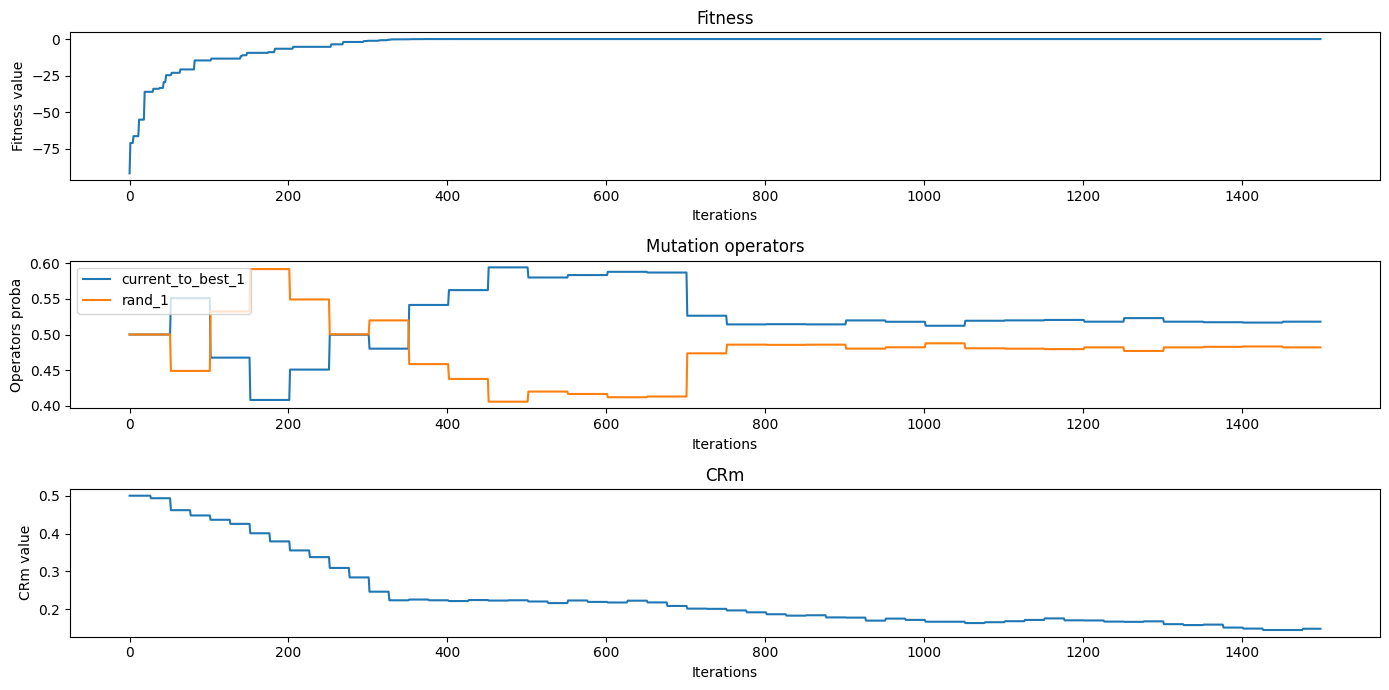

In [2]:
import matplotlib.pyplot as plt


m_proba = {}
for m_proba_i in stats['m_proba']:
        for key, value in m_proba_i.items():
            if key not in m_proba.keys():
                m_proba[key] = [value]
            else:
                m_proba[key].append(value)

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")


for key, value in m_proba.items():
    ax[1].plot(range(number_of_iterations), value, label=key)
ax[1].legend(loc="upper left")
ax[1].set_title('Mutation operators')
ax[1].set_ylabel('Operators proba')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations), stats['CRm'])
ax[2].set_title('CRm')
ax[2].set_ylabel('CRm value')
ax[2].set_xlabel("Iterations")


plt.tight_layout()
plt.show()